In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [2]:
raw_df_20_21 = pd.read_csv('../data/da_prices/GUI_ENERGY_PRICES_202012312300-202112312300_UTC.csv') 
raw_df_21_22 =pd.read_csv('../data/da_prices/GUI_ENERGY_PRICES_202112312300-202212312300_UTC.csv')
raw_df_22_23 =pd.read_csv('../data/da_prices/GUI_ENERGY_PRICES_202212312300-202312312300_UTC.csv')
raw_df_23_24 =pd.read_csv('../data/da_prices/GUI_ENERGY_PRICES_202312312300-202412312300_UTC.csv')
raw_df_24_25 =pd.read_csv('../data/da_prices/GUI_ENERGY_PRICES_202412312300-202512312300_UTC.csv')

In [3]:
def df_clean(raw_df):
    df = raw_df.copy()
    df.columns = df.columns.str.lower()
    df.drop(columns=['mtu (cet/cest)','area','sequence'],axis=1,inplace=True)
    df= df.rename(columns={'day-ahead price (eur/mwh)':'price','mtu (cet/cest) start':'start_cet','mtu (cet/cest) end':'end_cet','summerindicator':'sum_ind','mtu (cet/cest) end utc':'end_uct'})
    df['start_cet']=df.start_cet.apply(lambda x: x.replace('/','-'))
    df['end_cet'] = df.end_cet.apply(lambda x: x.replace('T',' '))
    df['end_uct'] = df.end_uct.apply(lambda x: x.replace('T',' '))  
    df['start_cet'] = pd.to_datetime(df['start_cet'],format='%d-%m-%Y %H:%M:%S',errors='coerce')
    df['end_cet'] = pd.to_datetime(df['end_cet'],format='%Y-%m-%d %H:%M',errors='coerce')
    df['end_uct'] = pd.to_datetime(df['end_uct'],format='%Y-%m-%d %H:%M',errors='coerce')
    return df

def df_add_features(df):
    df = df.assign(
    date = lambda x: x['end_uct'].dt.date,
    year = lambda x: x['end_uct'].dt.year,
    month = lambda x: x['end_uct'].dt.month,
    day = lambda x: x['end_uct'].dt.day,
    dayofyear = lambda x: x['end_uct'].dt.dayofyear,
    hour = lambda x: x['end_uct'].dt.hour)
    return df

In [4]:
df_21 = df_clean(raw_df_20_21)
df_21 = df_add_features(df_21)

In [5]:
df_22 = df_clean(raw_df_21_22)
df_22 = df_add_features(df_22)

In [6]:
df_23 = df_clean(raw_df_22_23)
df_23= df_add_features(df_23)

In [7]:
df_24 = df_clean(raw_df_23_24)
df_24 = df_add_features(df_24)

In [8]:
df_25 = df_clean(raw_df_24_25)
df_25 = df_add_features(df_25)

In [16]:
def plot_fun(df):    
    fig, ax = plt.subplots()
    sns.lineplot(x='end_uct', y='price', data=df, ax=ax)
    ax.set(title='price vs time', ylabel='price',xlabel='date')
    plt.grid()

In [12]:
df = pd.concat([df_21,df_22,df_23,df_24,df_25],axis=0,ignore_index=True)

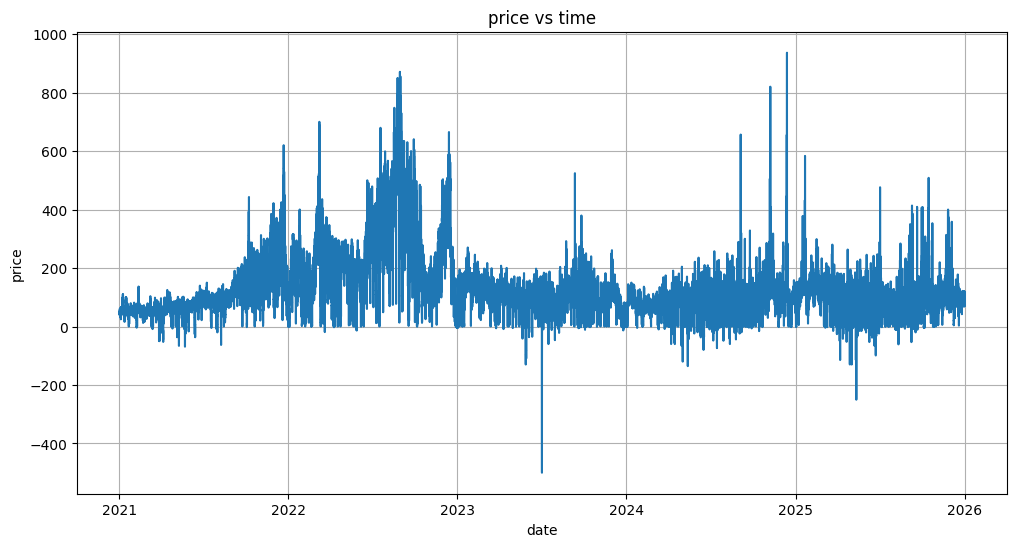

In [17]:
plot_fun(df)

In [15]:
df[df.start_cet.isna()]

,price,start_cet,end_cet,sum_ind,end_uct,date,year,month,day,dayofyear,hour
8263,38.62,NaT,2021-03-28 03:00:00,CEST,2021-03-28 01:00:00,2021-03-28,2021,3,28,87,1
8264,35.43,NaT,2021-03-28 03:15:00,CEST,2021-03-28 01:15:00,2021-03-28,2021,3,28,87,1
29092,69.03,NaT,2021-10-31 02:15:00,CEST,2021-10-31 00:15:00,2021-10-31,2021,10,31,304,0
29093,69.03,NaT,2021-10-31 02:30:00,CEST,2021-10-31 00:30:00,2021-10-31,2021,10,31,304,0
29094,69.03,NaT,2021-10-31 02:45:00,CEST,2021-10-31 00:45:00,2021-10-31,2021,10,31,304,0
29095,69.03,NaT,2021-10-31 02:00:00,CET,2021-10-31 01:00:00,2021-10-31,2021,10,31,304,1
29096,64.49,NaT,2021-10-31 02:15:00,CET,2021-10-31 01:15:00,2021-10-31,2021,10,31,304,1
29097,64.49,NaT,2021-10-31 02:30:00,CET,2021-10-31 01:30:00,2021-10-31,2021,10,31,304,1
29098,64.49,NaT,2021-10-31 02:45:00,CET,2021-10-31 01:45:00,2021-10-31,2021,10,31,304,1
29099,64.49,NaT,2021-10-31 03:00:00,CET,2021-10-31 02:00:00,2021-10-31,2021,10,31,304,2
